# Metodo de reduccion de dimensionalidad por medio del Analisis de Componentes Principales (PCA)

**Table of Contents**

[TOCM]

[TOC]

# **Conceptos Escenciales**
### ***¿Que es el PCA?***
La reduccion de dimensionalidad por medio del analisis de componentes **(PCA, por sus siglas en ingles)** es una tecnica utilizada en ciencia de datos para disminuir la cantidad de variables de un conjunto de datos sin perder demasiada informacion
### ***¿Que problema aborda la reduccion de dimensionalidad por medio del analisis de Componentes?***
El problema principal que aborda se le conoce como la maldicion de la dimensionalidad, se refiere a que en muchos conjuntos de datos, especialmente en aquellos con un gran numero de variables, pueden haber variables que esten correlacionadas entre si o que contienen informacion redundante.Ademas conforme aumentamos el numero de dimensiones nuestros datos se convierten en datos mas dispersos, Esto conlleva a dificultar el analisis,el modelado de datos, aumentar la complejidad computacional y aumentar la dificultad de la visualizacion de datos.

![](https://github.com/Andersoncrs/wiki/blob/development/imagenes/Reduccion_PCA.jpg?raw=true)

*Imagen1:Maldicion de la dimensionalidad*

### ***¿Como funciona la reduccion de dimensionalidad a traves del Analisis de componentes principales (PCA)?***
> El metodo PCA funciona bajo la suposicion de que a mayor varianza, mayor informacion se tiene
El metodo PCA lo que busca es encontrar una proyeccion de los datos que genere la mayor varianza, para entenrder este metodo vamos reducir la dimensionalidad de un conjunto de datos bidimensional a unidimensional, entonces podemos pensar como una lampara que alumbra los datos en donde ***bucamos que la sombra de los datos esten lo mas dispersos posibles***, entonces como tenemos muchas opciones en que podemos acomodar la lampara para hallar esa sombra, debemos hallarla matematicamente, por ejemplo:

- Podemos colocar en muchas posiciones como estas, pero debemos buscar la que genere la sombra con los datos mas dispersos, en otras palabras ***la proyeccion que genere la mayor varianza y por tanto es la que conserva la mayor cantidad informacion***

![](![](https://github.com/Andersoncrs/wiki/blob/development/imagenes/proyeccion_PCA.jpg?raw=true))

*Imagen2: Proyeccion metodo PCA

# Pasos para reducir la dimensiionalidad con el Metodo PCA

Para reducir la dimensionalidad de un conjunto de datos y hallar la sombra que proyecte la mayor varianza de los datos, en este ejemplo vamos a reducir un conjunto de datos bidimensional a unidimensional, utilizaremos las variables Ingreso(x) vs promedio de Horas Trabajadas en un DataFrame llamado datos,  realizamos lo siguiente:


In [8]:
# Librerias Utilizadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, decomposition

#Datos Utilizados

datos = {'ingreso' : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                      11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                      13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                      12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

         'horas_trabajadas' : [40.38, 41.55, 41.91, 40.18, 41.69,
                               42.32, 41.57, 41.26, 42.01, 41.46,
                               41.71, 41.36, 40.82, 41.22, 41.11,
                               41.07, 41.20, 40.61, 41.52, 41.26]}

#Lo Convertimos en un DataFrame

df = pd.DataFrame(datos)

### Paso 1: Debemos Estandarizar los datos
Debemos estandarizar los datos, esto se realiza para que manejen una escala comun las dos variables, utilizamos la formula de la estandaricacion estandar que es la de la Z - SCORE.

$z = \frac{x-mean(x))}{stdev(x)}$ *Al utilizar esta formula los datos quedan centrados en 0*



In [11]:
#Escalamos los Datos para que tengan una escala comun

escaldados = preprocessing.StandardScaler().fit_transform(df)

El resultado de estandarizar los los datos son:

![](https://github.com/Andersoncrs/wiki/blob/development/imagenes/comparacion_escalados.jpg?raw=true)

### Paso 2: Matriz De Covarianza
Hay dos formas principalmente de hallar la matriz de covarianza:
#### A traves de Numpy:
Para Hallar la covarianza indicamos utilizamos la instruccion `np.cov()` y le debemos pasar el arreglo escalado transpuesto




In [29]:
covarianza_np = np.cov(escaldados.T)
covarianza_np

array([[1.05263158, 0.68235986],
       [0.68235986, 1.05263158]])

#### A traves de un DataFrame
Debemos primero crear un DataFrame a partir de los datos escalados

# Anexos

### Codigo imagen1:

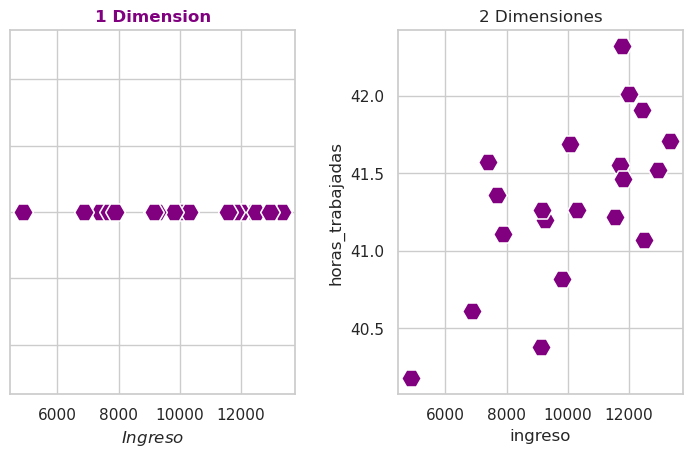

In [27]:

#Tema Genral de los graficos
sns.set_theme(style="whitegrid")

#Datos de Prueba
datos = {'ingreso' : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                      11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                      13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                      12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

         'horas_trabajadas' : [40.38, 41.55, 41.91, 40.18, 41.69,
                               42.32, 41.57, 41.26, 42.01, 41.46,
                               41.71, 41.36, 40.82, 41.22, 41.11,
                               41.07, 41.20, 40.61, 41.52, 41.26]}

#Creacion del los graficos
fig, axes = plt.subplots(1,2, figsize=(8,4.8), sharex=True)
sns.scatterplot(ax=axes[0], x= datos['ingreso'], y = 0, s=200, marker='H', color='purple')
sns.scatterplot(data=datos, x='ingreso', y='horas_trabajadas', color='purple', marker='H', s=200)

#Configuracion para que se vea de manera adecuada
plt.tight_layout(pad=2)
axes[0].set_yticklabels('')
axes[0].set_title('1 Dimension', fontweight=1000, color="purple")
axes[0].set_xlabel('$Ingreso$')
axes[1].set_title('2 Dimensiones')
plt.show()



### Codigo Imagen 3:

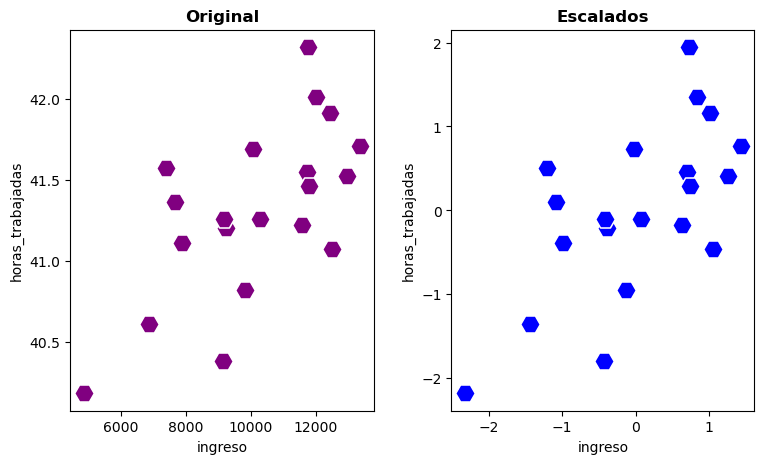

In [24]:
#Realizamos las graficas
fig , axes = plt.subplots(1,2,figsize=(8,4.8))
sns.scatterplot(ax=axes[0],data= df, x= 'ingreso', y='horas_trabajadas', marker= 'H', s=200, color='purple')
sns.scatterplot(ax=axes[1],data= df_escalado, x= 'ingreso', y='horas_trabajadas', marker= 'H', s=200, color='blue')

#Personalizamos las etiquetas
fig.tight_layout(pad=2)
axes[0].set_title('Original', fontweight=1000)
axes[1].set_title('Escalados', fontweight=1000)
fig.savefig('/home/anderson_pc/proyectos/imagenes/comparacion_escalados.jpg')






### ***¿Como funciona la reduccion de dimensionalidad a traves del Analisis de componentes principales (PCA)?***
> El metodo PCA funciona bajo la suposicion de que a mayor varianza, mayor informacion se tiene